In [9]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

In [10]:
df = pd.read_csv('./Data Formated/finance.csv', index_col=0)
df

,Country,Year,Government R&D,Corporate R&D,Venture capital,Private equity expansion capital,Public markets,Asset finance,Asset Finance minus Re-invested equity,Small distributed capacity,Private equity buy-outs,Public markets investor exits,Corporate M&A,Project acquisition & refinancing,Total: M&A/ buy-outs etc.,NEX Returns,Number of policies
0,China,2000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0
1,China,2001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0
2,China,2002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,1
3,China,2003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,1
4,China,2004,0.076,0.076,0.016,0.012,0.012,1.284,1.280,0.320,0.032,0.016,0.088,0.204,0.340,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,United States,2015,1.056,0.984,0.336,0.432,2.880,64.248,62.640,7.824,0.864,0.360,4.416,20.304,25.944,-9.891067,0
76,United States,2016,1.275,1.075,0.200,0.425,1.550,61.875,60.850,8.125,0.800,1.600,7.375,23.700,33.475,-9.514435,1
77,United States,2017,1.224,1.656,0.192,0.168,1.344,65.424,64.728,10.200,2.544,0.672,3.192,28.704,35.088,65.658118,0
78,United States,2018,1.320,1.872,0.048,0.528,1.440,58.080,56.688,9.168,3.120,0.024,3.504,29.712,36.360,-3.140805,1


[Text(0.5, 0, 'Government R&D'),
 Text(1.5, 0, 'Corporate R&D'),
 Text(2.5, 0, 'Venture capital'),
 Text(3.5, 0, 'Private equity expansion capital'),
 Text(4.5, 0, 'Public markets'),
 Text(5.5, 0, 'Asset finance'),
 Text(6.5, 0, 'Asset Finance minus Re-invested equity'),
 Text(7.5, 0, 'Small distributed capacity'),
 Text(8.5, 0, 'Private equity buy-outs'),
 Text(9.5, 0, 'Public markets investor exits'),
 Text(10.5, 0, 'Corporate M&A'),
 Text(11.5, 0, 'Project acquisition & refinancing'),
 Text(12.5, 0, 'Total: M&A/ buy-outs etc.'),
 Text(13.5, 0, 'Number of policies')]

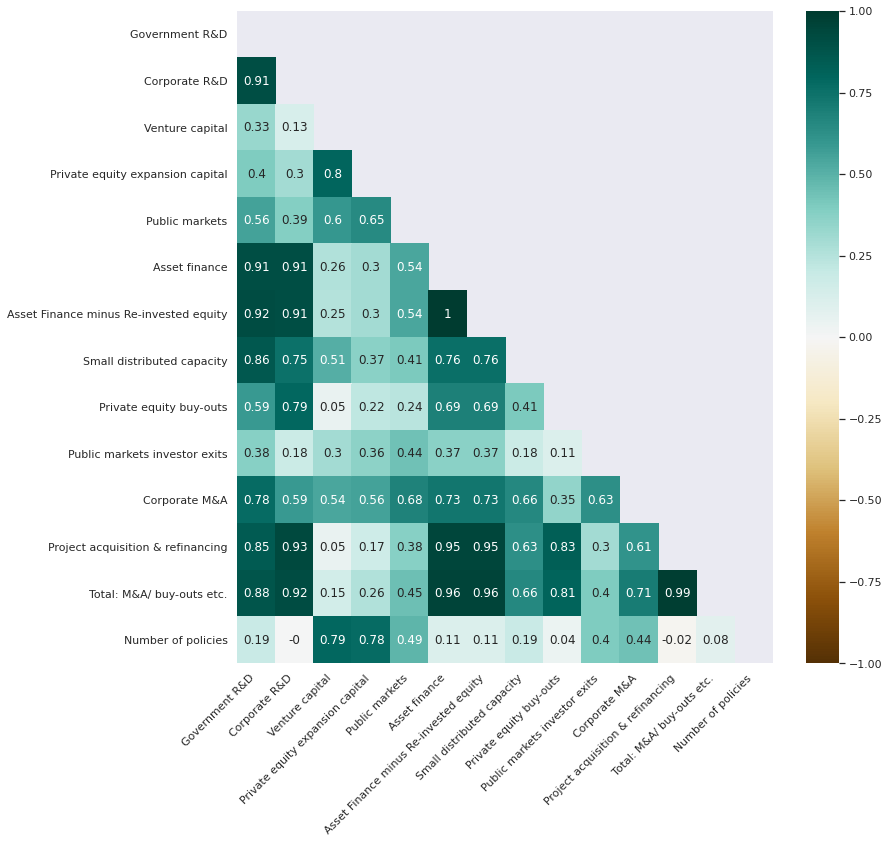

In [24]:
df = df.groupby('Year').sum()

plt.figure(figsize=(12, 12))

corr = np.round(df.corr(), 2)
mask = np.triu(np.ones_like(corr, dtype=bool))

h = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
h.set_xticklabels(h.get_xticklabels(), rotation=45, ha='right')

In [16]:
from sklearn.decomposition import PCA

In [21]:
df = df.drop('NEX Returns', axis=1)

In [25]:
pca = PCA(n_components=1)
pca.fit(df.T)
f = pca.components_[0]
f = f / f.max()

<AxesSubplot:xlabel='Year'>

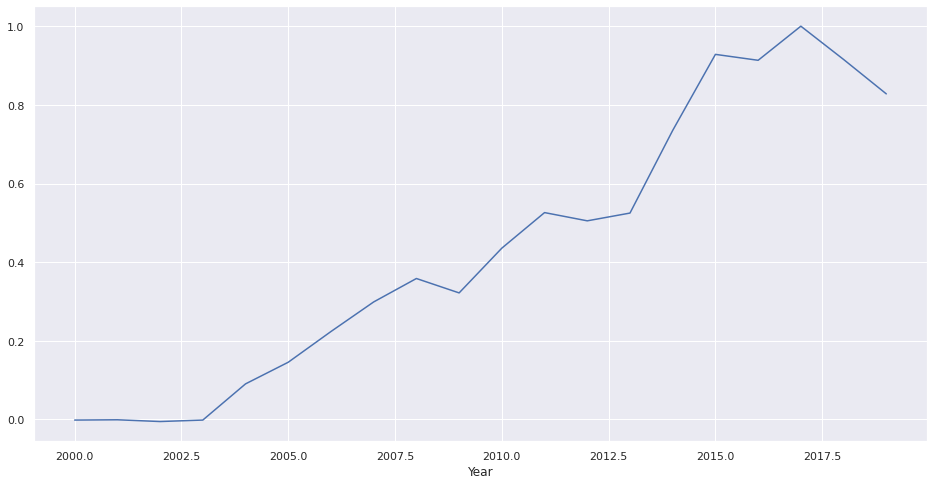

In [26]:
plt.figure(figsize=(16, 8))
sns.lineplot(x=df.index, y=f)